# Import plaintext

In [1]:
import csv
import numpy as np
pt = []
with open('../../trunk_zliu12/sim/custom_aes_vectors/picoaes_1k_ckey.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        pt.append(row['input'])
        #print(row['input'], row['output'])

In [2]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))
pt_array[0]

1024
16


array([229, 119,  31,  27,  21, 176, 179, 210, 174, 201, 119,   5,  37,
        37, 167, 225], dtype=uint8)

# Import key

In [3]:
import csv
import numpy as np
key = []
with open('../../trunk_zliu12/sim/custom_aes_vectors/picoaes_1k_ckey.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        key = row['key']

In [4]:
key

'00112233445566778899aabbccddeeff'

In [5]:
key_array = []
b = bytes.fromhex(key)
one_array = np.frombuffer(b,dtype=np.uint8)
key_array = one_array
#key_array.append(one_array)
key_array

array([  0,  17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187, 204,
       221, 238, 255], dtype=uint8)

# Import traces

In [6]:
import glob
import matplotlib.pylab as plt
NumofTraces = 1024
stry = []
floaty = []
path = "../../trunk_zliu12/joules/reports/reports_picoaes_sky130_50/gate/*.data"

extension = '_plot.png.data'
offset = len(extension)

for filename in sorted(glob.glob(path, recursive=True),key = lambda x: int(x[str(x)[:str(x).rfind('_')].rfind('_')+1:len(x)-offset])):
    #print(filename)
    with open(filename, 'r') as f:
        next(f)
        for line in f:
            row = line.split()
            stry.append(row[-1])
for i in range (len(stry)):
    floaty.append(float(stry[i]))
floaty = np.hstack(floaty)
trace_array_y = np.array_split(floaty, NumofTraces)

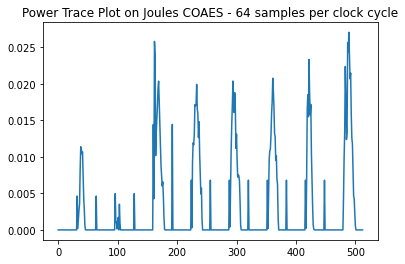

In [7]:
plt.plot(trace_array_y[3])
plt.title('Power Trace Plot on Joules COAES - 64 samples per clock cycle')
plt.savefig('2.jpg',dpi=300)

In [8]:
trace_array_y = np.array(trace_array_y)

In [9]:
print(len(pt_array))
print(len(pt_array[0]))
print(len(key_array))
print(len(trace_array_y))
print(len(trace_array_y[0]))

1024
16
16
1024
513


# SBox

In [10]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# CPA Attack -- Method 1

In [11]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

known_key = key_array

key_guess = []
full_cpa_list = []

for bnum in trange(0, 16):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
            ####################################power model on sbox
            st1 = pt_array[tnum][bnum] ^ kguess
            st2 = sbox[st1]
            hyp[tnum] = HW[st1 ^ st2]
            ####################################power model on sbox
            #hyp[tnum] = HW[intermediate(pt_array[tnum][bnum], kguess)]
            
        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely 00 (actual 00)
 Top 5 guesses: 
   00 - Diff = 0.485327
   B3 - Diff = 0.200928
   06 - Diff = 0.180872
   87 - Diff = 0.164506
   4D - Diff = 0.159948




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely 11 (actual 11)
 Top 5 guesses: 
   11 - Diff = 0.475491
   32 - Diff = 0.164659
   EB - Diff = 0.161798
   50 - Diff = 0.152469
   4C - Diff = 0.150644




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely 22 (actual 22)
 Top 5 guesses: 
   22 - Diff = 0.466619
   5E - Diff = 0.172488
   AC - Diff = 0.166596
   06 - Diff = 0.156761
   7F - Diff = 0.156389




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 33 (actual 33)
 Top 5 guesses: 
   33 - Diff = 0.517370
   1B - Diff = 0.177892
   50 - Diff = 0.176933
   63 - Diff = 0.160214
   ED - Diff = 0.156414




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 44 (actual 44)
 Top 5 guesses: 
   44 - Diff = 0.442996
   67 - Diff = 0.178065
   F1 - Diff = 0.161409
   2B - Diff = 0.160057
   6D - Diff = 0.149295




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 55 (actual 55)
 Top 5 guesses: 
   55 - Diff = 0.520056
   16 - Diff = 0.176918
   AA - Diff = 0.142197
   62 - Diff = 0.135922
   C3 - Diff = 0.130358




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 66 (actual 66)
 Top 5 guesses: 
   66 - Diff = 0.547646
   2D - Diff = 0.146608
   BB - Diff = 0.142584
   77 - Diff = 0.141689
   CD - Diff = 0.140731




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 77 (actual 77)
 Top 5 guesses: 
   77 - Diff = 0.440692
   D0 - Diff = 0.174731
   2A - Diff = 0.161058
   DF - Diff = 0.158811
   90 - Diff = 0.158374




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely 88 (actual 88)
 Top 5 guesses: 
   88 - Diff = 0.458216
   1E - Diff = 0.163778
   E7 - Diff = 0.139435
   77 - Diff = 0.139373
   68 - Diff = 0.138548




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely 99 (actual 99)
 Top 5 guesses: 
   99 - Diff = 0.474849
   B1 - Diff = 0.143718
   17 - Diff = 0.132469
   3E - Diff = 0.131776
   A9 - Diff = 0.131651




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AA (actual AA)
 Top 5 guesses: 
   AA - Diff = 0.494832
   EA - Diff = 0.159493
   F7 - Diff = 0.137410
   CD - Diff = 0.137192
   56 - Diff = 0.135912




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely BB (actual BB)
 Top 5 guesses: 
   BB - Diff = 0.445799
   40 - Diff = 0.165789
   98 - Diff = 0.142316
   E6 - Diff = 0.137255
   01 - Diff = 0.131502




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely CC (actual CC)
 Top 5 guesses: 
   CC - Diff = 0.477264
   22 - Diff = 0.161773
   4D - Diff = 0.155506
   68 - Diff = 0.152733
   15 - Diff = 0.144280




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely DD (actual DD)
 Top 5 guesses: 
   DD - Diff = 0.497592
   68 - Diff = 0.176773
   4B - Diff = 0.167075
   D9 - Diff = 0.151707
   80 - Diff = 0.150947




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely EE (actual EE)
 Top 5 guesses: 
   EE - Diff = 0.464954
   15 - Diff = 0.157409
   3C - Diff = 0.137267
   AB - Diff = 0.137205
   4B - Diff = 0.134079




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely FF (actual FF)
 Top 5 guesses: 
   FF - Diff = 0.520499
   69 - Diff = 0.177088
   04 - Diff = 0.149264
   2C - Diff = 0.145650
   4A - Diff = 0.143866




<Figure size 432x288 with 0 Axes>

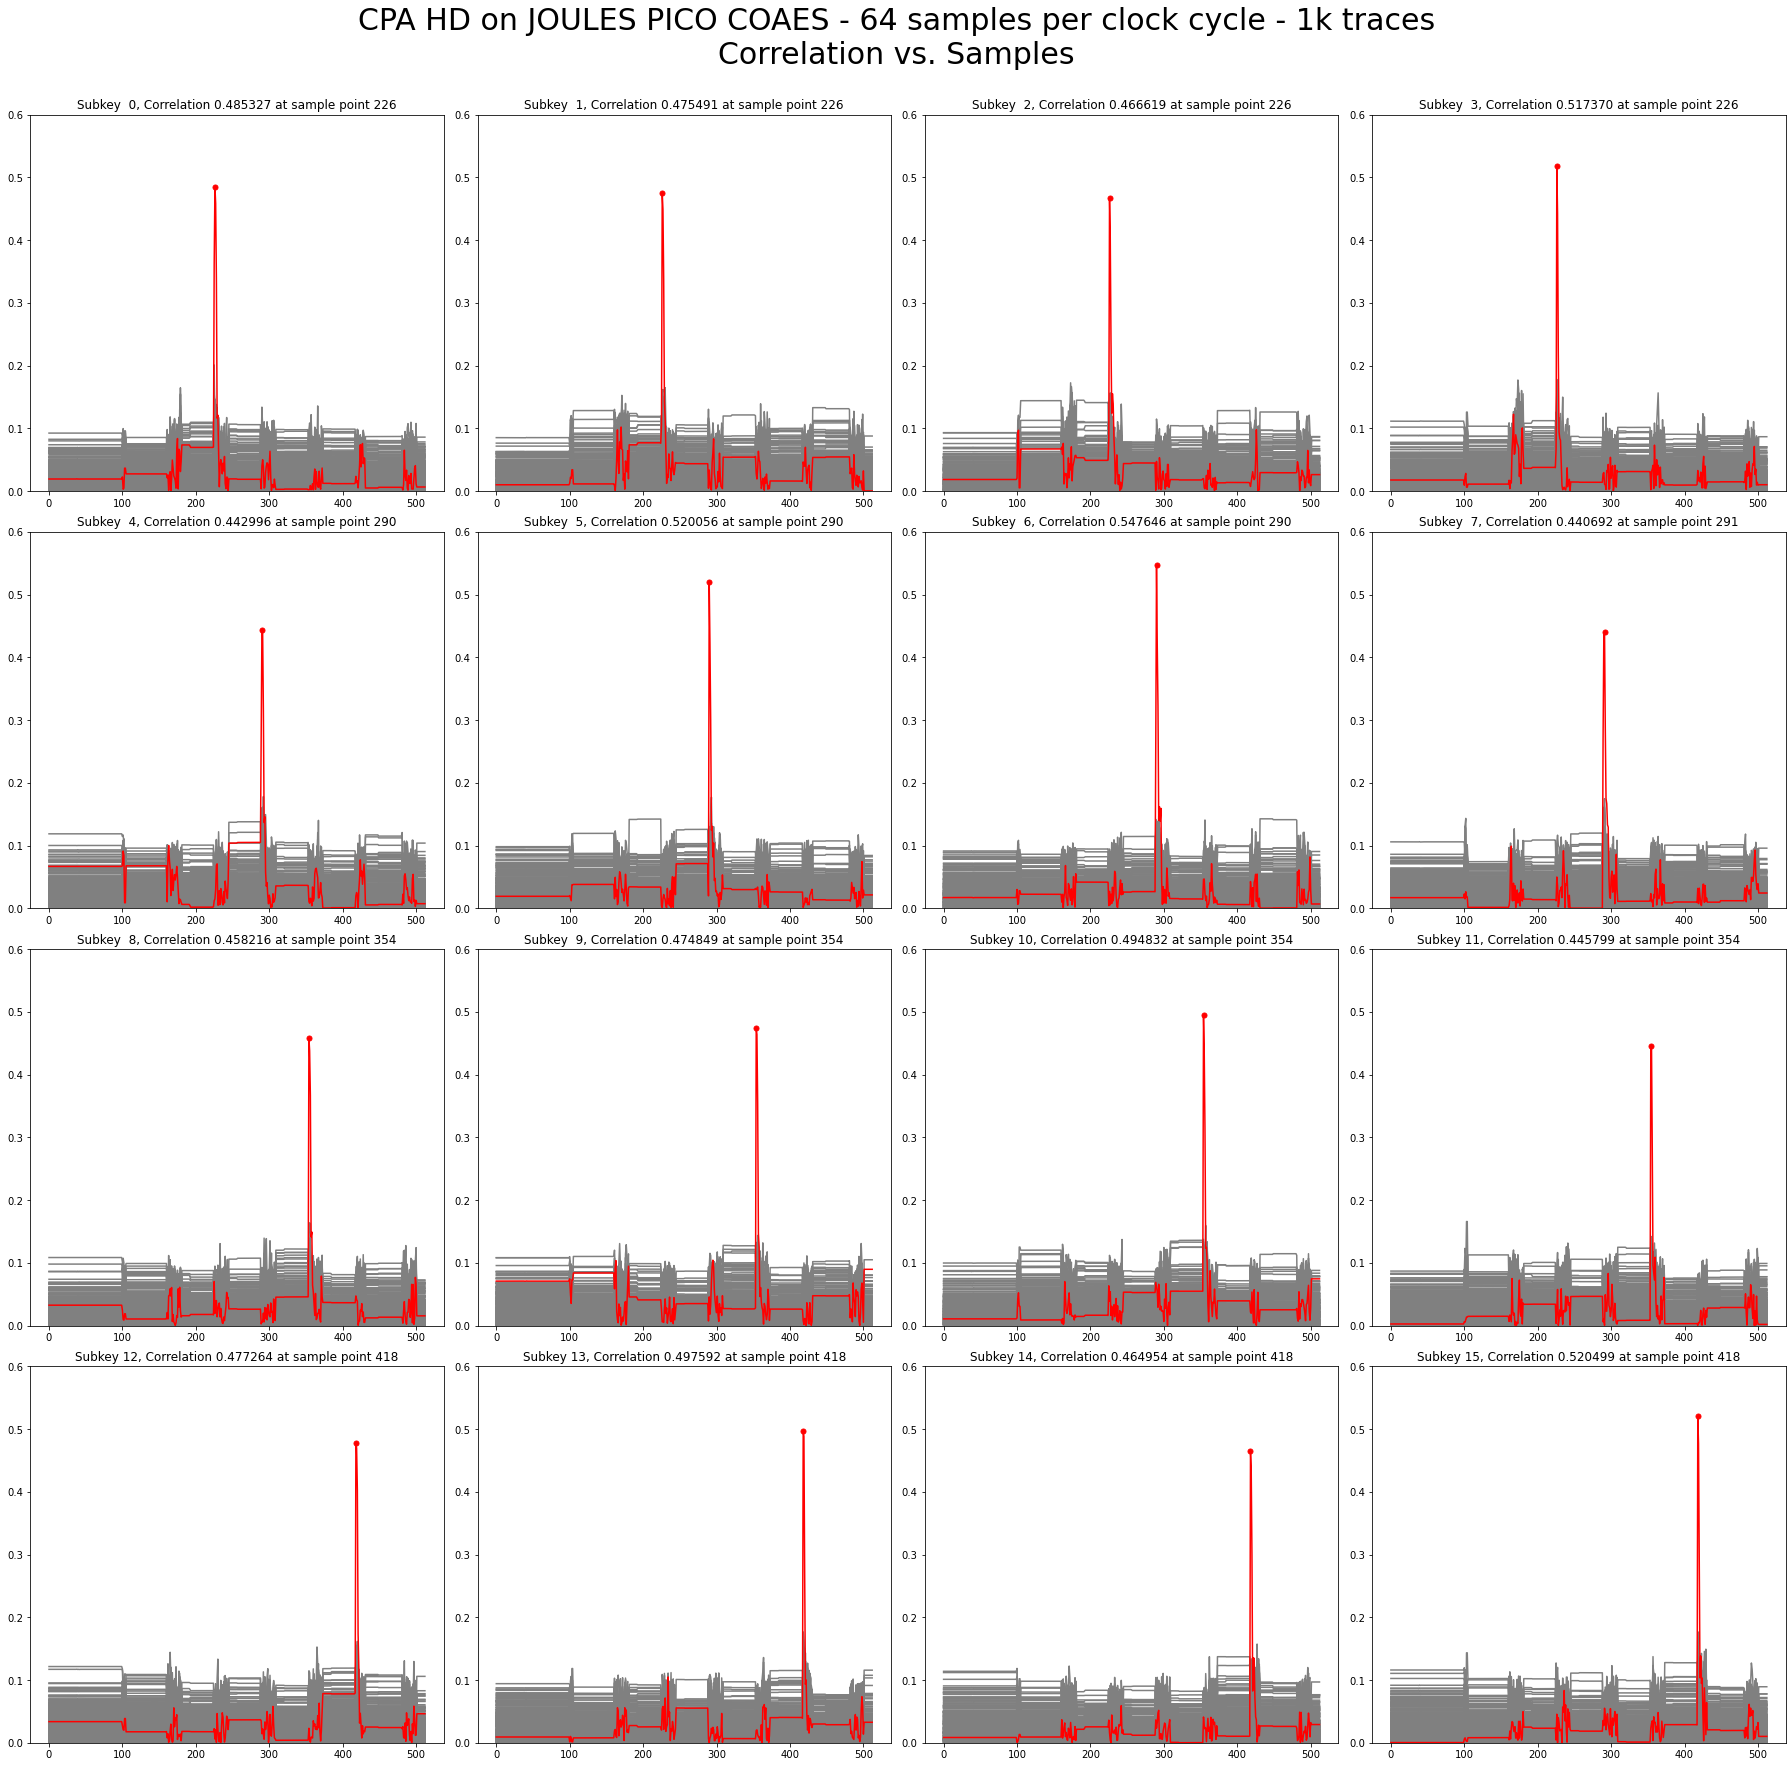

In [15]:
###### HD(pt xor key, sbox[pt xor key])
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[subkey][guess]),color="grey")
    value += 1
    corr = abs(full_cpa_list[subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    plt.ylim(0,0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('CPA HD on JOULES PICO COAES - 64 samples per clock cycle - 1k traces\nCorrelation vs. Samples', size=30)

plt.savefig('11.jpg',dpi=300) # save jpg/png

plt.show()

# How Many Traces Needed for Method 1

In [16]:
traces_enc_full = trace_array_y

In [17]:
len(traces_enc_full[0])

513

In [18]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [19]:
x = np.arange(50, 1050, 50)
x

array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])

In [20]:
full_cpa_list = []

key_full_guess = []
second_top_key_guess_full = []

how_many_correct_keybytes = []
is_same = 0

full_top_two_max_corr = []

traces_enc = []
pt = []
known_key = key_array

for traces in trange(50, 1050, 50):
    x = np.arange(50, 1050, 50)
    
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(pt_array[0:traces])
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    second_top_key_guess = []
    
    cpa_list = []
    
    top_two_max_corr = []
    
    for bnum in range(0, 16):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                #hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]
                st1 = pt_array[tnum][bnum] ^ kguess
                st2 = sbox[st1]
                hyp[tnum] = HW[st1 ^ st2]

            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        
        sorted_args = np.argsort(maxcpa)[::-1]
        #print("Subkey %2x: Top cap is %02f, second  top cpa is %02f"%(bnum, maxcpa[sorted_args[0]], maxcpa[sorted_args[1]]))
        
        top_two_max_corr.append([maxcpa[sorted_args[0]],maxcpa[sorted_args[1]]])
        
        
        key_guess.append(sorted_args[0])
        second_top_key_guess.append(sorted_args[1])

    full_cpa_list.append(cpa_list)
    
    full_top_two_max_corr.append(top_two_max_corr)
    
    key_full_guess.append(key_guess)
    second_top_key_guess_full.append(second_top_key_guess)
    
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")
    

  0%|          | 0/20 [00:00<?, ?it/s]

For 50 traces, correct key byte are  6


For 100 traces, correct key byte are 11


For 150 traces, correct key byte are 15


For 200 traces, correct key byte are 16


For 250 traces, correct key byte are 16


For 300 traces, correct key byte are 16


For 350 traces, correct key byte are 16


For 400 traces, correct key byte are 16


For 450 traces, correct key byte are 16


For 500 traces, correct key byte are 16


For 550 traces, correct key byte are 16


For 600 traces, correct key byte are 16


For 650 traces, correct key byte are 16


For 700 traces, correct key byte are 16


For 750 traces, correct key byte are 16


For 800 traces, correct key byte are 16


For 850 traces, correct key byte are 16


For 900 traces, correct key byte are 16


For 950 traces, correct key byte are 16


For 1000 traces, correct key byte are 16




# plot downsampleing factor vs correlation peaks

In [21]:
print(len(full_cpa_list))
print(len(full_cpa_list[0]))
print(len(full_cpa_list[0][0]))
print(len(full_cpa_list[0][0][0]))

20
16
256
513


In [22]:
correct_full_list = []
for subset in range (len(full_cpa_list)):
    correct_16_subbyte_list = []
    for subkey in range (len(full_cpa_list[0])):
        max_correct = [] 
        for guess in range (len(full_cpa_list[0][0])):
            if (guess == known_key[subkey]):
                corr = abs(full_cpa_list[subset][subkey][guess])
                ymax = corr.max()
                max_correct.append(ymax)
        correct_16_subbyte_list.append(max_correct)
    correct_full_list.append(correct_16_subbyte_list)

In [23]:
print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))

20
16
1


In [24]:
corr_subkey = []
for subkey in range (len(correct_full_list[0])):
    corr_subset = []
    for subset in range (len(correct_full_list)):
        corr_subset.append(correct_full_list[subset][subkey])
    corr_subkey.append(corr_subset)

In [25]:
print(len(corr_subkey))
print(len(corr_subkey[0]))

16
20


In [26]:
corr_subkey[2]

[[0.46422316298510863],
 [0.41257548734203864],
 [0.38784319340813783],
 [0.37758362786883465],
 [0.38268463652135937],
 [0.4361812529461571],
 [0.4557055280414985],
 [0.4522308645050282],
 [0.4653467280040496],
 [0.4641735308967371],
 [0.46511863302754997],
 [0.46667802992391116],
 [0.4802861946387758],
 [0.47842961702319675],
 [0.4739577560366246],
 [0.4711036783599945],
 [0.4575640521192433],
 [0.46122153298097524],
 [0.4642914023162449],
 [0.46118352858078626]]

In [27]:
np.array(corr_subkey).tofile("regular_HD_correct_peak.bin")

# add cpa noise

In [28]:
print(len(full_top_two_max_corr))
print(len(full_top_two_max_corr[0]))
print(len(full_top_two_max_corr[0][0]))

20
16
2


In [29]:
wrong_subset_full = []
for subkey in range (len(full_top_two_max_corr[0])):
    wrong_subset = []
    for subset in range (len(full_top_two_max_corr)):
        wrong_subset.append(full_top_two_max_corr[subset][subkey])
    wrong_subset_full.append(wrong_subset)

In [30]:
print(len(wrong_subset_full))
print(len(wrong_subset_full[0]))
print(len(wrong_subset_full[0][0]))

16
20
2


In [31]:
corr_subkey[15]

[[0.5343239800362586],
 [0.535990394750108],
 [0.5311000232390902],
 [0.5355051463006648],
 [0.5201453244034656],
 [0.5309944862228071],
 [0.5441873789715264],
 [0.5603498037312994],
 [0.5371254422770715],
 [0.5349026815845007],
 [0.5323258182333314],
 [0.5330617639759964],
 [0.5285160154372407],
 [0.525140512775773],
 [0.5282270571031681],
 [0.5252451862372481],
 [0.5200984441446548],
 [0.5170903766050166],
 [0.5223141214677895],
 [0.5232336879304992]]

In [32]:
wrong_subset_full[15]

[[0.5645877737568439, 0.5441565375192994],
 [0.535990394750108, 0.4328783608142485],
 [0.5311000232390902, 0.3276165414372413],
 [0.5355051463006648, 0.28898723220735784],
 [0.5201453244034656, 0.26499698008795136],
 [0.5309944862228071, 0.2726578121107736],
 [0.5441873789715264, 0.24166714960268368],
 [0.5603498037312994, 0.22808302468958103],
 [0.5371254422770715, 0.20604546705618568],
 [0.5349026815845007, 0.19812940566731882],
 [0.5323258182333314, 0.204376121428111],
 [0.5330617639759964, 0.21102323139990856],
 [0.5285160154372407, 0.21589900363220163],
 [0.525140512775773, 0.21270644626994015],
 [0.5282270571031681, 0.20677550333956932],
 [0.5252451862372481, 0.20365963299143455],
 [0.5200984441446548, 0.1937396916411445],
 [0.5170903766050166, 0.19824954901611022],
 [0.5223141214677895, 0.1878706264311396],
 [0.5232336879304992, 0.18328076050565917]]

In [33]:
noise_full = []
for subkey in range (16):
    noise = []
    for subset in range (len(wrong_subset_full[0])):
        if wrong_subset_full[subkey][subset][0] > corr_subkey[subkey][subset]:
            noise.append(wrong_subset_full[subkey][subset][0])
        else:
            noise.append(wrong_subset_full[subkey][subset][1])
    noise_full.append(noise)

In [34]:
noise_full[15]

[0.5645877737568439,
 0.4328783608142485,
 0.3276165414372413,
 0.28898723220735784,
 0.26499698008795136,
 0.2726578121107736,
 0.24166714960268368,
 0.22808302468958103,
 0.20604546705618568,
 0.19812940566731882,
 0.204376121428111,
 0.21102323139990856,
 0.21589900363220163,
 0.21270644626994015,
 0.20677550333956932,
 0.20365963299143455,
 0.1937396916411445,
 0.19824954901611022,
 0.1878706264311396,
 0.18328076050565917]

In [134]:
print(len(noise_full))
print(len(noise_full[0]))

16
20


In [35]:
np.array(noise_full).tofile("regular_HD_noise.bin")

# CPA Number of traces vs. correctly guessed key bytes

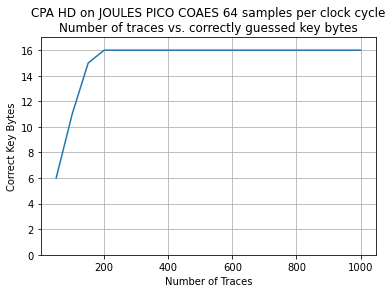

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

plt.plot(x, how_many_correct_keybytes)
plt.ylim(0,17)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
plt.title('CPA HD on JOULES PICO COAES 64 samples per clock cycle\nNumber of traces vs. correctly guessed key bytes')
plt.savefig('33.jpg',dpi=100) 

In [37]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (16):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = abs(full_cpa_list[i][subkey][guess])
                ### edit above -- the list name need to be change for the especific name 
                ymax = corr.max()
                max_correct.append(ymax)
            else:
                corr = abs(full_cpa_list[i][subkey][guess])
                ymax = corr.max()
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

20
16
1
20
16
255


In [38]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (16):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [39]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (16):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

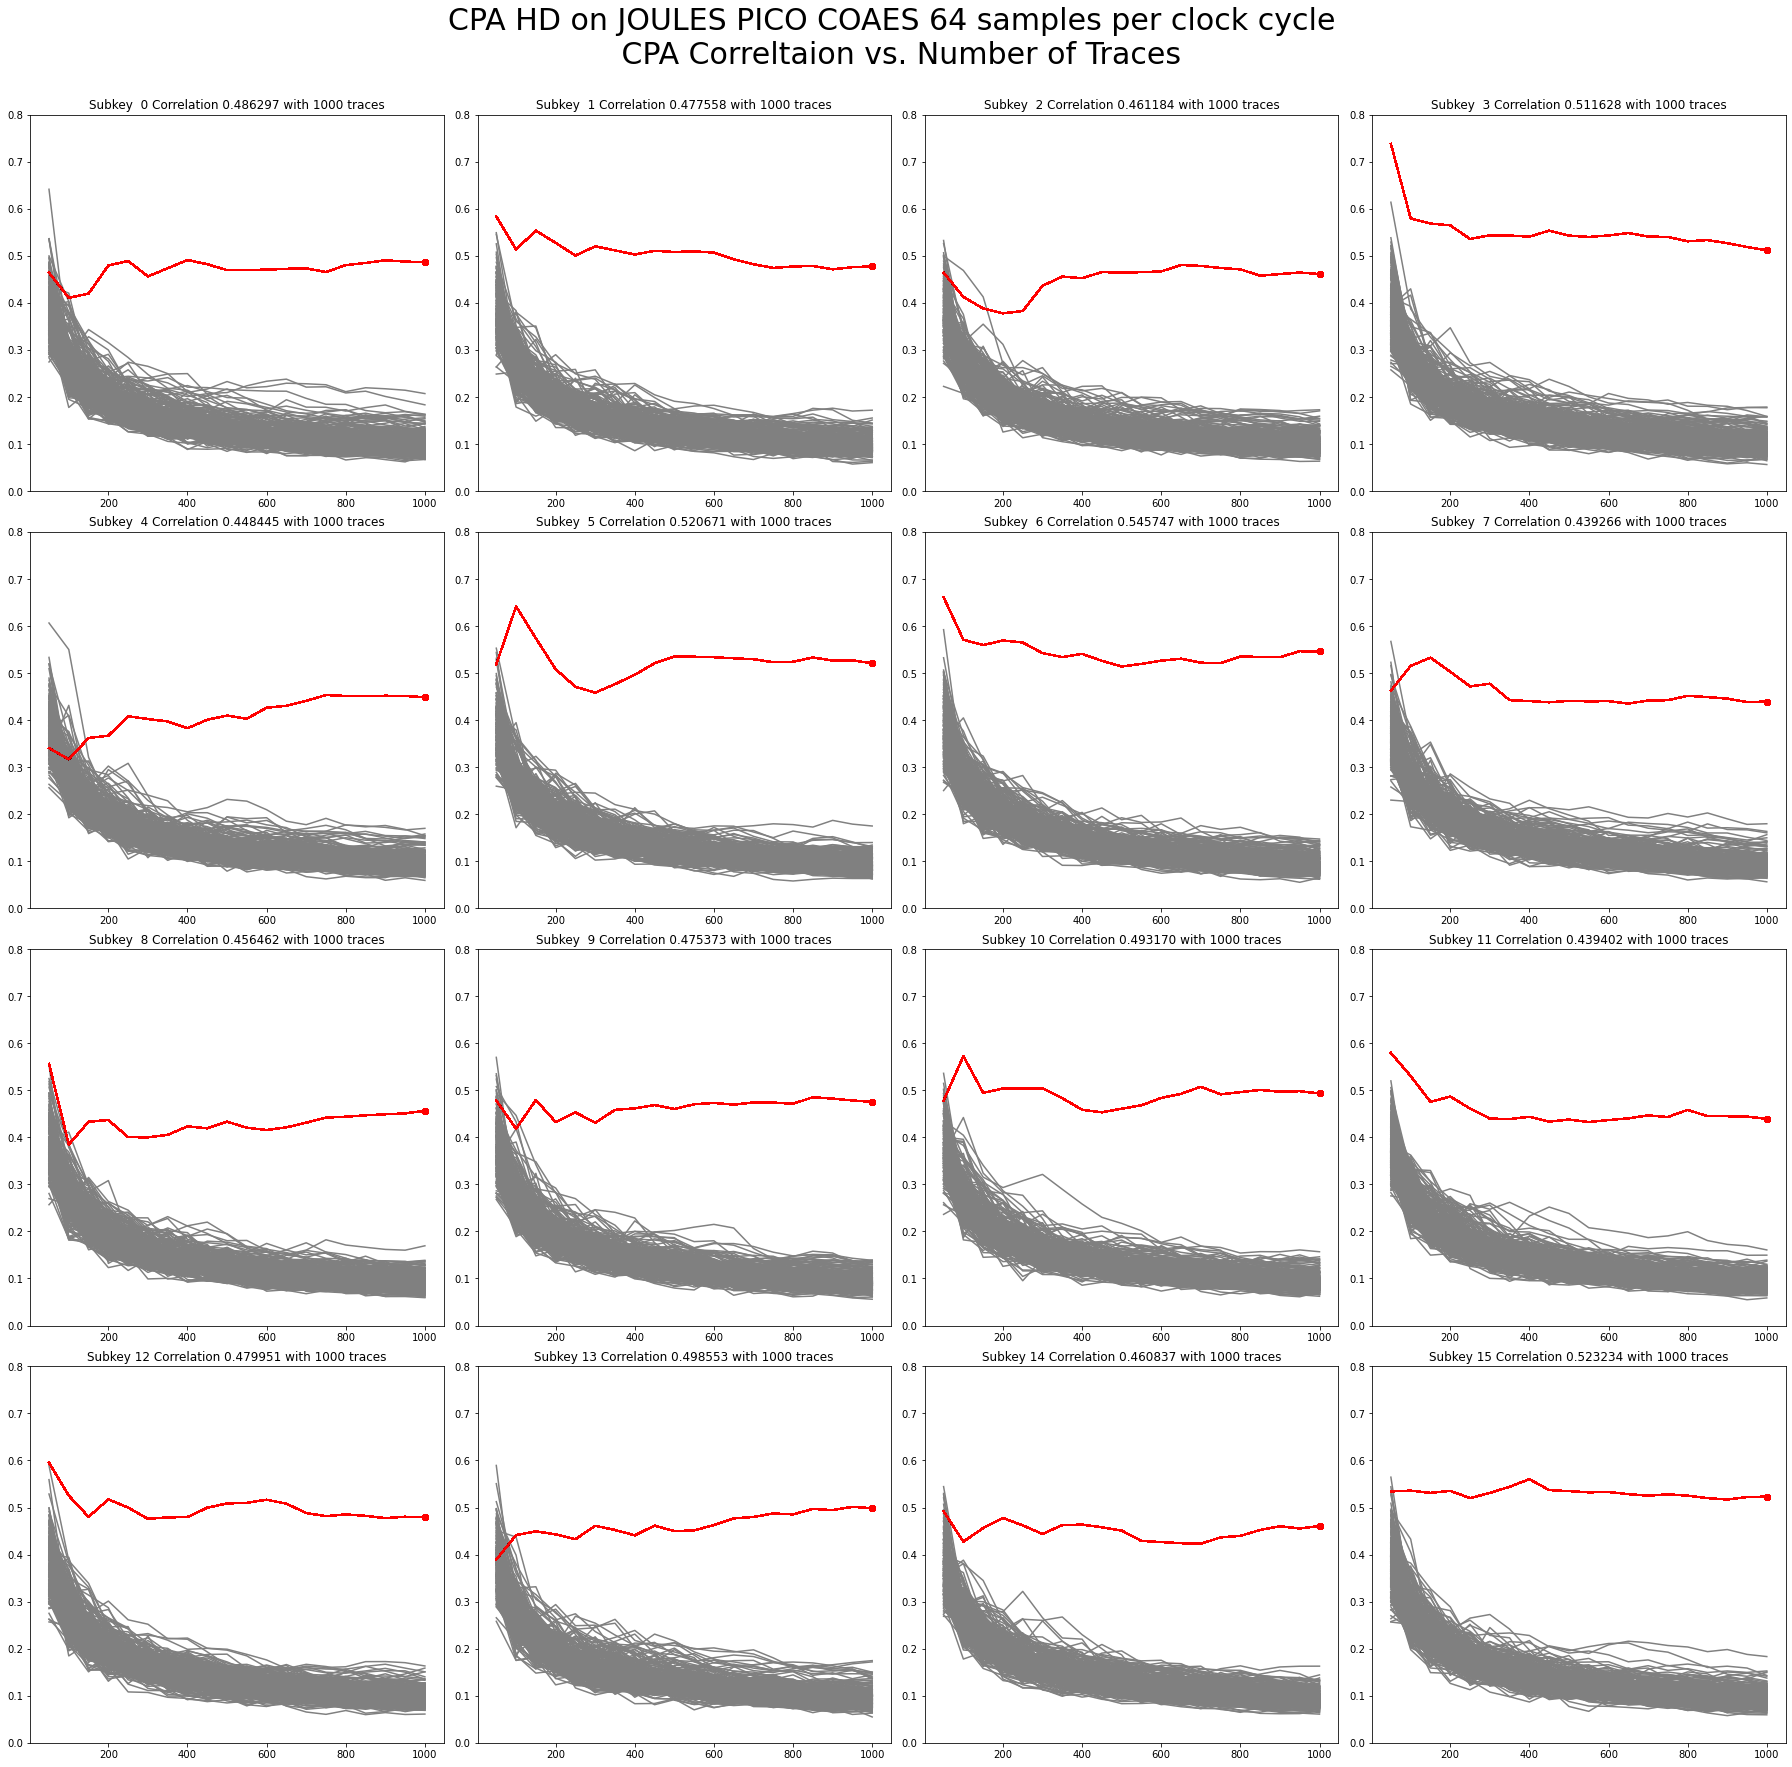

In [43]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    for guess in range (len(else_16[0])):
        pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
        
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        
        last = len(x)-1
        val = corr_plot_full[subkey][last][0]
        plt.plot(x[last],val,marker='.', markersize=10, color="red",zorder=255)
        plt.ylim(0,0.8)
        
        plt.title('Subkey %2d Correlation %2f with %2d traces' %(subkey,val,x[last]))
        
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('CPA HD on JOULES PICO COAES 64 samples per clock cycle \n CPA Correltaion vs. Number of Traces', size=30)

plt.savefig('44.jpg',dpi=300)  
            
plt.show()